In [1]:
import re 
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import torch

In [2]:
print('hello worlds')

hello worlds


In [3]:
if torch.cuda.is_available():    

    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB


In [4]:
!pip install transformers

In [5]:
df = pd.read_excel("/kaggle/input/personal-data/BanglaBlendCleanedData.xlsx")


# Report the number of sentences.
print('Number of training sentences: {:,}\n'.format(df.shape[0]))

# Display 10 random rows from the data.
df.sample(3)

Number of training sentences: 7,350



,Sentence,Labels(English),Labels(Bangla),Class
999,ভগবদ্গীতা হল একটি শ্রদ্ধেয় হিন্দু ধর্মগ্রন্থ ...,Common,Cholito(চলিত),1
2756,ঢাকা হলো ছায়ামানুষের দেশ,Common,Cholito(চলিত),1
2706,কবর নাটকটি তাদের চেষ্টায় কারাগারে মঞ্চস্থ হতে...,Common,Cholito(চলিত),1


In [6]:
df.rename(columns={'Class':'label'}, inplace=True)

In [7]:
df.shape

(7350, 4)

In [8]:
df.label.value_counts()

label
0    3675
1    3675
Name: count, dtype: int64

In [9]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [10]:
df = df[['label' ,'Sentence']]
df.head()

,label,Sentence
0,0,সেখানকার জানালা দিয়ে সমুদ্র দেখা যাইতেছিল
1,0,আমি কিছু দেখিতে পারিতেছি না
2,0,সকলেরই অনাবৃত দেহ সকলের সেই অনাবৃত বক্ষে আরশির...
3,0,মেয়েটি সেদিন ভিক্ষুককে সাহায্য করিয়াছিল
4,0,তুমি প্রশংসা কর না কর বৃদ্ধ বসিয়া তোমায় পুরা...


In [11]:
label_counts = df['label'].value_counts()
print(label_counts)

label
0    3675
1    3675
Name: count, dtype: int64


In [12]:
urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|(www\.)[^ ]*)"
userPattern       = '@[^\s]+'
hashtagPattern    = '#[^\s]+'
sequencePattern   = r"(.)\1\1+"
seqReplacePattern = r"\1\1"


def preprocess_apply(tweet):

    tweet = tweet.lower()

    # Replace all URls with '<url>'
    tweet = re.sub(urlPattern,'',tweet)
    # Replace @USERNAME to '<user>'.
    tweet = re.sub(userPattern,'', tweet)
    
    # Replace 3 or more consecutive letters by 2 letter.
    tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

    # Adding space on either side of '/' to seperate words (After replacing URLS).
    tweet = re.sub(r'/', ' / ', tweet)
    return tweet

In [13]:
from tqdm import tqdm

tqdm.pandas()

In [14]:
# df['preprocessing_sentence'] = df['Sentence'].progress_apply(preprocess_apply)
df.head(4)

,label,Sentence
0,0,সেখানকার জানালা দিয়ে সমুদ্র দেখা যাইতেছিল
1,0,আমি কিছু দেখিতে পারিতেছি না
2,0,সকলেরই অনাবৃত দেহ সকলের সেই অনাবৃত বক্ষে আরশির...
3,0,মেয়েটি সেদিন ভিক্ষুককে সাহায্য করিয়াছিল


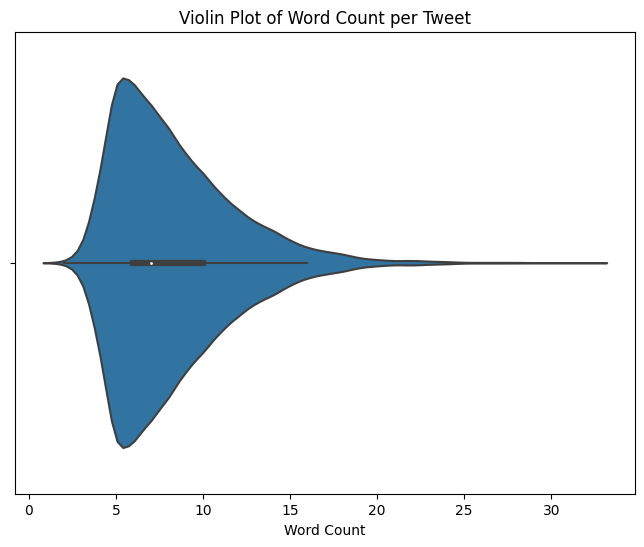

In [15]:
df['word_count'] = df['Sentence'].apply(lambda x: len(str(x).split()))

# Calculate the statistics
plt.figure(figsize=(8, 6))
sns.violinplot(x=df['word_count'])
plt.title('Violin Plot of Word Count per Tweet')
plt.xlabel('Word Count')
plt.show()

In [16]:
df.head()

,label,Sentence,word_count
0,0,সেখানকার জানালা দিয়ে সমুদ্র দেখা যাইতেছিল,6
1,0,আমি কিছু দেখিতে পারিতেছি না,5
2,0,সকলেরই অনাবৃত দেহ সকলের সেই অনাবৃত বক্ষে আরশির...,14
3,0,মেয়েটি সেদিন ভিক্ষুককে সাহায্য করিয়াছিল,5
4,0,তুমি প্রশংসা কর না কর বৃদ্ধ বসিয়া তোমায় পুরা...,11


## Normalizer From BUET

In [17]:
pip install git+https://github.com/csebuetnlp/normalizer

  Cloning https://github.com/csebuetnlp/normalizer to /tmp/pip-req-build-5_iuklpf
  Running command git clone --filter=blob:none --quiet https://github.com/csebuetnlp/normalizer /tmp/pip-req-build-5_iuklpf
  Resolved https://github.com/csebuetnlp/normalizer to commit d405944dde5ceeacb7c2fd3245ae2a9dea5f35c9
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.0/185.0 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for normalizer: filename=normalizer-0.0.1-py3-none-any.whl size=6859 sha256=e7722d6e65c82c9bac7ff69ec7771bfcb8a22a548390dd6ff3021719c4af67d3
  Stored in directory: /tmp/pip-ephem-wheel-cache-o2o4ncu8/wheels/2e/79/9c/cd96d490298305d51d2da11484bb2c25fd1f759a6906708282
  Created wheel for emoji: filename=emoji-1.4.2-py3-none-any.whl size=186459 sha256=1c9149c146ad9d18968dad36bd21811be4f752a9

In [18]:
from transformers import BertTokenizer

from transformers import AutoModelForPreTraining, AutoTokenizer
from normalizer import normalize 
import torch


# Load the BERT tokenizer.
print('Loading BERT tokenizer...')


model_path = "csebuetnlp/banglabert_large"
tokenizer = AutoTokenizer.from_pretrained(model_path)



Loading BERT tokenizer...


tokenizer_config.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/880 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/528k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [19]:
df['Sentence'] = df['Sentence'].progress_apply(normalize)

100%|██████████| 7350/7350 [00:00<00:00, 10658.44it/s]


In [20]:
from sklearn.model_selection import train_test_split

# Calculate test_size as a fraction (50/7350)
test_size = 150/len(df)

# Split the DataFrame
train_df, test_df = train_test_split(
    df,
    test_size=test_size,
    random_state=42,
    stratify=df['label']
)

# Verify the sizes
print(f"Total samples in training set: {len(train_df)}")
print(f"Total samples in test set: {len(test_df)}")

# Verify class distribution
print("\nTraining set class distribution:")
print(train_df['label'].value_counts())
print("\nTest set class distribution:")
print(test_df['label'].value_counts())

Total samples in training set: 7200
Total samples in test set: 150

Training set class distribution:
label
1    3600
0    3600
Name: count, dtype: int64

Test set class distribution:
label
0    75
1    75
Name: count, dtype: int64


In [21]:
train_df.head(3)

,label,Sentence,word_count
1385,1,আমি তাকে জিজ্ঞেস করেছিলাম তার পরীক্ষা কবে থেকে...,10
1921,0,ভদ্রলোকে কি কখন সন্ধ্যার সময় বাসায় থাকে,7
3457,1,পাতাল রেলে দেরি হয়েছিল তাই আমাকে একটি ট্যাক্স...,12


In [22]:
test_df.head()

,label,Sentence,word_count
3611,0,প্রশ্ন শুনিয়া দিবাকরের চোখের জল আবার গড়াইয়া...,8
2364,0,আমি সেদিন রাস্তায় একটা বিড়াল দেখিয়াছিলাম,6
660,0,কৃষক কন্যারা শুষ্ক গোময় সংগ্রহ করিয়া যে স্তূ...,15
326,1,আমি ক্লাসিক গাড়ির ভিনটেজ লুক পছন্দ করি তাদের ...,11
6970,0,যুবতীদের সুরের ঢেউ নিকটের পাহাড়ে গিয়া লাগিতে...,8


In [23]:
sentences = train_df.Sentence.values
labels = train_df.label.values

print(len(sentences))

print(len(labels))

7200
7200


In [24]:
# Print the original sentence.
print(' Original: ', sentences[0])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(sentences[0]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))

 Original:  আমি তাকে জিজ্ঞেস করেছিলাম তার পরীক্ষা কবে থেকে শুরু হবে
Tokenized:  ['আমি', 'তাকে', 'জিজ্ঞেস', 'করেছিলাম', 'তার', 'পরীক্ষা', 'কবে', 'থেকে', 'শুরু', 'হবে']
Token IDs:  [857, 1339, 2803, 4943, 826, 2565, 3931, 842, 1116, 918]


### Wrost Performance In Bangla Cause the tokenizer is not for Bengali Language.

In [25]:
# Print the original sentence.
dem = 'আমি তোমাকে ভালবাসি।'
print(' Original: ', dem)

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(dem))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(dem)))

 Original:  আমি তোমাকে ভালবাসি।
Tokenized:  ['আমি', 'তোমাকে', 'ভালবাসি', '।']
Token IDs:  [857, 1934, 9463, 205]


In [26]:
df.head(3)

,label,Sentence,word_count
0,0,সেখানকার জানালা দিয়ে সমুদ্র দেখা যাইতেছিল,6
1,0,আমি কিছু দেখিতে পারিতেছি না,5
2,0,সকলেরই অনাবৃত দেহ সকলের সেই অনাবৃত বক্ষে আরশির...,14


In [27]:
df.word_count.describe()

count    7350.000000
mean        8.259456
std         3.511895
min         2.000000
25%         6.000000
50%         7.000000
75%        10.000000
max        32.000000
Name: word_count, dtype: float64

In [28]:
# max_len = 0
# total_len = 0

# for sent in sentences:
#     input_ids = tokenizer.encode(sent, add_special_tokens=True)
#     max_len = max(max_len, len(input_ids))
#     total_len += len(input_ids)

# # Calculate the average sentence length
# average_len = total_len / len(sentences)

# print('Max sentence length:', max_len)
# print('Average sentence length:', average_len)

## Create a Demo N sample 

In [29]:
demo_sentences = sentences
demo_labels = labels

In [30]:
label_map = {
    0: 'sadhu',   # Classical/Literary Bangla
    1: 'cholito'  # Colloquial/Modern Bangla
}

In [31]:
input_ids = []
attention_masks = []

for sent in tqdm(demo_sentences):

    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        truncation=True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])


input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
demo_labels = torch.tensor(demo_labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])


100%|██████████| 7200/7200 [00:01<00:00, 6103.22it/s]


Original:  আমি তাকে জিজ্ঞেস করেছিলাম তার পরীক্ষা কবে থেকে শুরু হবে
Token IDs: tensor([   2,  857, 1339, 2803, 4943,  826, 2565, 3931,  842, 1116,  918,    3,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0])


In [32]:
from torch.utils.data import TensorDataset, random_split

dataset = TensorDataset(input_ids, attention_masks, demo_labels)

# Define split sizes
train_size = int(0.93 * len(dataset)) 
val_size = int(0.07 * len(dataset))    
#test_size = len(dataset) - train_size - val_size  


train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# Output the sizes of each dataset
print(f'{train_size:,} training samples')
print(f'{val_size:,} validation samples')
# print(f'{test_size:,} test samples')


6,696 training samples
504 validation samples


In [34]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler


batch_size = 64


train_dataloader = DataLoader(
            train_dataset,
            sampler = RandomSampler(train_dataset),
            batch_size = batch_size 
        )


validation_dataloader = DataLoader(
            val_dataset,
            sampler = SequentialSampler(val_dataset), 
            batch_size = batch_size 
        )

# test_dataloader = DataLoader(
#     test_dataset, 
#     sampler=SequentialSampler(test_dataset), 
#     batch_size=batch_size 
# )

## Model

In [35]:
from transformers import BertForSequenceClassification, AdamW, BertConfig, logging

from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch
from normalizer import normalize  # pip install git+https://github.com/csebuetnlp/normalizer

# Specify the model path
model_path = "csebuetnlp/banglabert_large"

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_path)

## Model

In [ ]:
# # Load the model with a custom number of labels
# model = AutoModelForSequenceClassification.from_pretrained(
#     model_path,
#     num_labels=2,  # Update this to the number of labels for your classification task
#     output_attentions=False,
#     output_hidden_states=False,
# )


In [ ]:




# Move the model to GPU
model.cuda()

In [36]:
# Example usage
sentence = "আমি কৃতজ্ঞ কারণ আপনি আমার জন্য অনেক কিছু করেছেন।"
normalized_sentence = normalize(sentence)
inputs = tokenizer(normalized_sentence, return_tensors="pt", padding=True, truncation=True, max_length=128)

# Move inputs to GPU
inputs = {key: val.cuda() for key, val in inputs.items()}

# Forward pass with dummy labels
labels = torch.tensor([1]).cuda()  # Example label
outputs = model(**inputs, labels=labels)

print(outputs)


NameError: name 'model' is not defined

In [ ]:
model

## Custom BERT

## Bert With LSTM

In [37]:
import torch
import torch.nn as nn
from transformers import AutoModel, AutoConfig
import os

class CustomBanglaBertWithBiLSTM(nn.Module):
    def __init__(self, model_name=model_path, num_labels=2, lstm_hidden_size=256, lstm_layers=1, dropout_rate=0.1):
        super(CustomBanglaBertWithBiLSTM, self).__init__()
        self.num_labels = num_labels
        
        # Load BanglaBERT (ELECTRA-based) model and its configuration
        self.config = AutoConfig.from_pretrained(model_name)
        self.config.num_labels = num_labels
        
        self.bert = AutoModel.from_pretrained(model_name)
        
        # BiLSTM layer
        self.lstm = nn.LSTM(
            input_size=self.config.hidden_size,
            hidden_size=lstm_hidden_size,
            num_layers=lstm_layers,
            bidirectional=True,
            batch_first=True
        )
        
        # Dropout layer
        self.dropout = nn.Dropout(dropout_rate)
        
        # Classification head
        self.classifier = nn.Linear(lstm_hidden_size * 2, num_labels)      # * 2 because it's bidirectional

    def forward(self, input_ids, attention_mask=None, token_type_ids=None, labels=None):
        # Forward pass through BanglaBERT
        outputs = self.bert(input_ids=input_ids, 
                            attention_mask=attention_mask, 
                            token_type_ids=token_type_ids)
        
        # Get the sequence output (last hidden states)
        sequence_output = outputs.last_hidden_state
        
        # Pass through BiLSTM
        lstm_output, _ = self.lstm(sequence_output)
        
        # Get the last time step output from both directions
        lstm_output = lstm_output[:, -1, :]
        
        # Apply dropout
        lstm_output = self.dropout(lstm_output)
        
        # Classification
        logits = self.classifier(lstm_output)

        loss = None
        if labels is not None:
            loss_fct = nn.CrossEntropyLoss()
            loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))

        return {"loss": loss, "logits": logits}

    def save_pretrained(self, output_dir):
        """Save the model weights and configuration."""
        os.makedirs(output_dir, exist_ok=True)
        model_to_save = self.module if hasattr(self, 'module') else self
        torch.save(model_to_save.state_dict(), os.path.join(output_dir, "pytorch_model.bin"))
        self.config.save_pretrained(output_dir)
        print(f"Model saved to {output_dir}")

    @classmethod
    def from_pretrained(cls, pretrained_model_name_or_path, model_name="csebuetnlp/banglabert_large", *model_args, **kwargs):
        """Load a model from a pretrained model."""
        config = AutoConfig.from_pretrained(pretrained_model_name_or_path)
        model = cls(model_name=model_name, num_labels=config.num_labels, **kwargs)
        model.load_state_dict(torch.load(os.path.join(pretrained_model_name_or_path, "pytorch_model.bin")))
        return model

In [38]:
# Instantiate the model
model = CustomBanglaBertWithBiLSTM(num_labels=2)
model.cuda()


pytorch_model.bin:   0%|          | 0.00/1.35G [00:00<?, ?B/s]

CustomBanglaBertWithBiLSTM(
  (bert): ElectraModel(
    (embeddings): ElectraEmbeddings(
      (word_embeddings): Embedding(32000, 1024, padding_idx=0)
      (position_embeddings): Embedding(512, 1024)
      (token_type_embeddings): Embedding(2, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): ElectraEncoder(
      (layer): ModuleList(
        (0-23): 24 x ElectraLayer(
          (attention): ElectraAttention(
            (self): ElectraSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): ElectraSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
              (LayerNorm)

In [ ]:
# input_ids[0], attention_masks[0], demo_labels[0]

In [39]:
import torch
import gc

# Example: after finishing a computation
# del result # Delete the tensor
gc.collect()  # Run garbage collector
torch.cuda.empty_cache()  # Clear the unused memory from CUDA cache

In [40]:
from transformers import get_linear_schedule_with_warmup

optimizer = AdamW(model.parameters(),
                  lr = 2e-5, 
                  eps = 1e-8 
                )

epochs = 4
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps)

In [41]:
import torch
import numpy as np
from tqdm import tqdm
import time
import os

# Function to calculate accuracy
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

# Train function
def train_epoch(model, train_dataloader, optimizer, scheduler, device):
    model.train()
    total_train_loss = 0
    start_time = time.time()
    for step, batch in tqdm(enumerate(train_dataloader), total=len(train_dataloader), desc="Training"):
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        model.zero_grad()
        result = model(b_input_ids, 
                       token_type_ids=None, 
                       attention_mask=b_input_mask, 
                       labels=b_labels)
        loss = result['loss']
        total_train_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()
        if (step + 1) % 1000 == 0:
            print(f"Batch {step + 1}/{len(train_dataloader)}: Loss = {loss.item():.4f}")
    avg_train_loss = total_train_loss / len(train_dataloader)
    epoch_time = time.time() - start_time
    print(f"Training completed in {epoch_time // 60:.0f}m {epoch_time % 60:.0f}s")
    return avg_train_loss

# Validation function
def validate_epoch(model, validation_dataloader, device):
    model.eval()
    total_eval_loss = 0
    total_eval_accuracy = 0
    start_time = time.time()
    for batch in tqdm(validation_dataloader, total=len(validation_dataloader), desc="Validating"):
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        with torch.no_grad():
            result = model(b_input_ids, 
                           token_type_ids=None, 
                           attention_mask=b_input_mask, 
                           labels=b_labels)
        loss = result['loss']
        logits = result['logits']
        total_eval_loss += loss.item()
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        total_eval_accuracy += flat_accuracy(logits, label_ids)
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    validation_time = time.time() - start_time
    print(f"  Accuracy: {avg_val_accuracy:.2f}")
    print(f"  Validation Loss: {avg_val_loss:.2f}")
    print(f"  Validation took: {validation_time // 60:.0f}m {validation_time % 60:.0f}s")
    return avg_val_loss, avg_val_accuracy

# Function to save the best model
def save_best_model(model, tokenizer, output_dir, best_val_loss, avg_val_loss):
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
        print(f"  New best validation loss: {best_val_loss:.2f}. Saving model...")
        model_to_save = model.module if hasattr(model, 'module') else model
        model_to_save.save_pretrained(output_dir)
        tokenizer.save_pretrained(output_dir) 
    return best_val_loss



In [42]:
# Main training function
def train_model(model, train_dataloader, validation_dataloader, optimizer, scheduler, tokenizer, epochs, device, output_dir):
    training_stats = []
    best_val_loss = float('inf')
    for epoch_i in range(epochs):
        print(f"\n======== Epoch {epoch_i + 1} / {epochs} ========")
        print("Training...")
        avg_train_loss = train_epoch(model, train_dataloader, optimizer, scheduler, device)
        print(f"\n  Average training loss: {avg_train_loss:.2f}")
        print("\nRunning Validation...")
        avg_val_loss, avg_val_accuracy = validate_epoch(model, validation_dataloader, device)
        print(f"  Accuracy: {avg_val_accuracy:.2f}")
        print(f"  Validation Loss: {avg_val_loss:.2f}")
        training_stats.append({
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
        })
        best_val_loss = save_best_model(model, tokenizer, output_dir, best_val_loss, avg_val_loss)
    print("\nTraining complete!")
    return training_stats

In [43]:
# import time
# import torch
# import numpy as np
# from tqdm import tqdm

# # Function to calculate accuracy
# def flat_accuracy(preds, labels):
#     pred_flat = np.argmax(preds, axis=1).flatten()
#     labels_flat = labels.flatten()
#     return np.sum(pred_flat == labels_flat) / len(labels_flat)

# # Train function with timing
# def train_epoch(model, train_dataloader, optimizer, scheduler, device):
#     model.train()  # Put the model in training mode
#     total_train_loss = 0

#     # Track the time for training
#     start_time = time.time()

#     for step, batch in tqdm(enumerate(train_dataloader), total=len(train_dataloader), desc="Training"):
#         b_input_ids = batch[0].to(device)
#         b_input_mask = batch[1].to(device)
#         b_labels = batch[2].to(device)

#         model.zero_grad()

#         # Forward pass
#         result = model(b_input_ids, 
#                        token_type_ids=None, 
#                        attention_mask=b_input_mask, 
#                        labels=b_labels,
# #                        return_dict=True
#                       )

#         loss = result['loss']
#         logits = result['logits']

#         total_train_loss += loss.item()

#         # Backward pass
#         loss.backward()

#         # Gradient clipping
#         torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

#         # Optimizer and scheduler step
#         optimizer.step()
#         scheduler.step()
        
#         if (step + 1) % 1000 == 0:
#             print(f"Batch {step + 1}/{len(train_dataloader)}: Loss = {loss.item():.4f}")

#     avg_train_loss = total_train_loss / len(train_dataloader)

#     # End timing and print duration
#     epoch_time = time.time() - start_time
#     print(f"Training completed in {epoch_time // 60:.0f}m {epoch_time % 60:.0f}s")

#     return avg_train_loss

# # Validation function with timing
# def validate_epoch(model, validation_dataloader, device):
#     model.eval()  # Put the model in evaluation mode

#     total_eval_accuracy = 0
#     total_eval_loss = 0

#     # Track the time for validation
#     start_time = time.time()

#     for batch in tqdm(validation_dataloader, desc="Validation"):
#         b_input_ids = batch[0].to(device)
#         b_input_mask = batch[1].to(device)
#         b_labels = batch[2].to(device)

#         with torch.no_grad():
#             result = model(b_input_ids, 
#                            token_type_ids=None, 
#                            attention_mask=b_input_mask,
#                            labels=b_labels,
# #                            return_dict=True
#                           )

#         loss = result['loss']
#         logits = result['logits']
        
#         total_eval_loss += loss.item()

#         logits = logits.detach().cpu().numpy()
#         label_ids = b_labels.to('cpu').numpy()

#         total_eval_accuracy += flat_accuracy(logits, label_ids)

#     avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
#     avg_val_loss = total_eval_loss / len(validation_dataloader)

#     # End timing and print duration
#     epoch_time = time.time() - start_time
#     print(f"Validation completed in {epoch_time // 60:.0f}m {epoch_time % 60:.0f}s")

#     return avg_val_loss, avg_val_accuracy

# # Function to save the model if validation loss improves
# def save_best_model(model, output_dir, best_val_loss, avg_val_loss):

#     if avg_val_loss < best_val_loss:
#         best_val_loss = avg_val_loss
#         if not os.path.exists(output_dir):
#             os.makedirs(output_dir)
#         print(f"  New best validation loss: {best_val_loss:.2f}. Saving model...")
#         # Save the model and tokenizer
#         model_to_save = model.module if hasattr(model, 'module') else model
#         model_to_save.save_pretrained(output_dir)
#         tokenizer.save_pretrained(output_dir) 
#     return best_val_loss


## Model Training

In [44]:
import torch
import gc

# Example: after finishing a computation
# del model
# del modelx# Delete the tensor
gc.collect()  # Run garbage collector
torch.cuda.empty_cache()  # Clear the unused memory from CUDA cache

In [45]:
# epochs = 4

In [ ]:
output_dir = '/kaggle/working/best_model_save/'
training_stats = train_model(model, 
                             train_dataloader, 
                             validation_dataloader, 
                             optimizer, 
                             scheduler,
                             tokenizer,
                             epochs=epochs, 
                             device=device, 
                             output_dir=output_dir)


======== Epoch 1 / 4 ========
Training...


Training: 100%|██████████| 105/105 [02:06<00:00,  1.21s/it]


Training completed in 2m 7s

  Average training loss: 0.22

Running Validation...


Validating: 100%|██████████| 8/8 [00:03<00:00,  2.52it/s]


  Accuracy: 0.97
  Validation Loss: 0.10
  Validation took: 0m 3s
  Accuracy: 0.97
  Validation Loss: 0.10
  New best validation loss: 0.10. Saving model...
Model saved to /kaggle/working/best_model_save/

======== Epoch 2 / 4 ========
Training...


Training: 100%|██████████| 105/105 [02:06<00:00,  1.20s/it]


Training completed in 2m 6s

  Average training loss: 0.10

Running Validation...


Validating: 100%|██████████| 8/8 [00:03<00:00,  2.52it/s]


  Accuracy: 0.96
  Validation Loss: 0.11
  Validation took: 0m 3s
  Accuracy: 0.96
  Validation Loss: 0.11

======== Epoch 3 / 4 ========
Training...


Training:  18%|█▊        | 19/105 [00:22<01:43,  1.21s/it]

## Evaluate on the test set


In [ ]:
import time
import torch
import numpy as np
from tqdm import tqdm

def predict_and_evaluate(model, test_dataloader, device):
    model.eval()

    total_test_loss = 0
    total_test_accuracy = 0
    predictions = []
    true_labels = []

    # Track the time for evaluation
    start_time = time.time()

    # Progress bar using tqdm
    with torch.no_grad():
        for batch in tqdm(test_dataloader, desc="Evaluating", total=len(test_dataloader)):
            b_input_ids = batch[0].to(device)
            b_input_mask = batch[1].to(device)
            b_labels = batch[2].to(device)

            # Forward pass
            outputs = model(b_input_ids, 
                            token_type_ids=None, 
                            attention_mask=b_input_mask,
                            labels=b_labels,
#                             return_dict=True
                           )

            loss = outputs['loss']
            logits = outputs['logits']

            total_test_loss += loss.item()

            # Move logits and labels to CPU for further calculations
            logits = logits.detach().cpu().numpy()
            label_ids = b_labels.to('cpu').numpy()

            # Calculate accuracy
            total_test_accuracy += flat_accuracy(logits, label_ids)

            # Get predictions and append to lists
            pred_flat = np.argmax(logits, axis=1).flatten()
            predictions.extend(pred_flat)
            true_labels.extend(label_ids.flatten())

    # Calculate average loss and accuracy
    avg_test_loss = total_test_loss / len(test_dataloader)
    avg_test_accuracy = total_test_accuracy / len(test_dataloader)

    # End timing and print duration
    epoch_time = time.time() - start_time
    print(f"Evaluation completed in {epoch_time // 60:.0f}m {epoch_time % 60:.0f}s")

    return predictions, true_labels, avg_test_loss, avg_test_accuracy

## Load Best Model 

In [ ]:
output_dir

In [ ]:

# my_model = BertForSequenceClassification.from_pretrained(output_dir)
# tokenizer = BertTokenizer.from_pretrained(output_dir)


# my_model.to(device)


# def load_custom_model(output_dir):
#     model = CustomBertWithBiLSTMForSequenceClassification.from_pretrained(output_dir)
#     tokenizer = BertTokenizer.from_pretrained(output_dir)
#     return model, tokenizer

# # Usage
# my_model, tokenizer = load_custom_model(output_dir)
# my_model.to(device)

In [ ]:
# Evaluate on the test set
predictions, true_labels, test_loss, test_accuracy = predict_and_evaluate(model, validation_dataloader, device)

print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Loss: {test_loss:.2f}")

In [ ]:
from collections import Counter as cn

cn(true_labels), cn(predictions)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(predictions, true_labels, class_names):

    cm = confusion_matrix(true_labels, predictions)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    
    # Plot the confusion matrix
    fig, ax = plt.subplots(figsize=(8, 8))
    disp.plot(cmap='Blues', ax=ax, values_format='d')  # 'd' for displaying raw counts
    plt.title("Confusion Matrix (Raw Counts)")
    plt.show()

    report = classification_report(true_labels, predictions, target_names=class_names)
    print("Classification Report:\n")
    print(report)

class_names = ['Negative', 'Positive']  

plot_confusion_matrix(predictions, true_labels, class_names)


In [ ]:

def process_and_predict_sentence(sentence, model, tokenizer, device='cuda'):

    encoded_dict = tokenizer.encode_plus(
        sentence,                     
        add_special_tokens=True,     
        max_length=64,                
        pad_to_max_length=True,      
        truncation=True,              
        return_attention_mask=True,   
        return_tensors='pt'           
    )


    input_ids = encoded_dict['input_ids'].to(device)
    attention_mask = encoded_dict['attention_mask'].to(device)


    model.eval()


    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)

    logits = outputs['logits']

    #probabilities = torch.softmax(logits, dim=1)
    predicted_class = torch.argmax(logits, dim=1).item()
    
    return predicted_class


    #return probabilities


## Test The Model

In [ ]:
df.head(3)

In [ ]:
df.tail(3)

In [ ]:
test_sentence = df["Sentence"][7347]
print(test_sentence)
pred = process_and_predict_sentence(test_sentence, model, tokenizer)

pred

In [ ]:
test_df.head(3)

In [ ]:
from functools import partial

predict_fn = partial(process_and_predict_sentence, 
                    model=model, 
                    tokenizer=tokenizer, 
                    device='cuda')

test_df['pred_label'] = test_df['Sentence'].progress_apply(predict_fn)

In [ ]:
test_df.head()

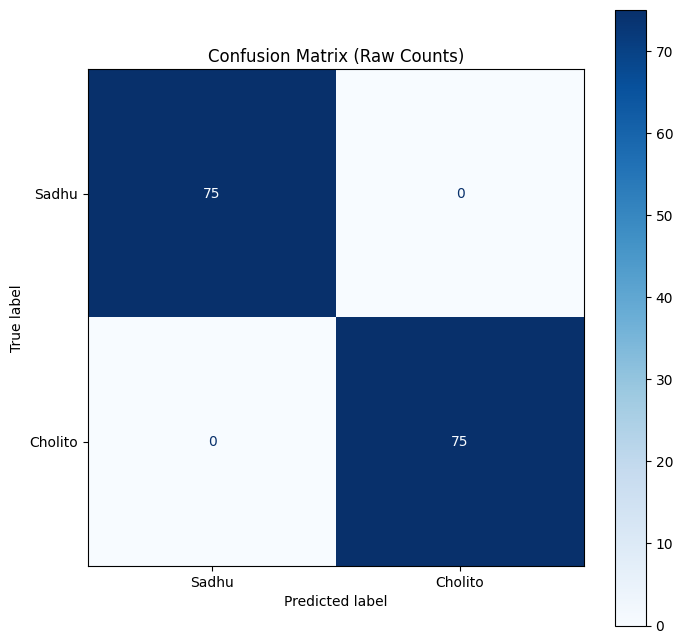

Classification Report:

              precision    recall  f1-score   support

       Sadhu       1.00      1.00      1.00        75
     Cholito       1.00      1.00      1.00        75

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



In [65]:
preds = test_df.pred_label
true = test_df.label

class_names = ['Sadhu', 'Cholito']
plot_confusion_matrix(preds, true, class_names)


## Explainer LIME

In [ ]:
import numpy as np
from lime.lime_text import LimeTextExplainer
import torch

def predict_proba(texts):
    """
    Modified prediction function for LIME that returns probabilities for both classes
    """
    probabilities = []
    
    for text in texts:
        # Use the existing tokenization and prediction logic
        encoded_dict = tokenizer.encode_plus(
            text,                     
            add_special_tokens=True,     
            max_length=64,                
            pad_to_max_length=True,      
            truncation=True,              
            return_attention_mask=True,   
            return_tensors='pt'           
        )
        input_ids = encoded_dict['input_ids'].to('cuda')
        attention_mask = encoded_dict['attention_mask'].to('cuda')
        
        model.eval()
        with torch.no_grad():
            outputs = model(input_ids, attention_mask=attention_mask)
            
        logits = outputs['logits']
        # Convert logits to probabilities using softmax
        probs = torch.softmax(logits, dim=1).squeeze().cpu().numpy()
        probabilities.append(probs)
    
    return np.array(probabilities)

# Initialize LIME explainer for binary classification
explainer = LimeTextExplainer(class_names=['sadhu', 'cholito'])

explainer

In [ ]:
test_df.head(3)

In [ ]:
# Select an example to explain (x=301 in your case)
x = 3611
label_map = {0: 'sadhu', 1: 'cholito'}  # Using the dictionary we created earlier

# Generate explanation
exp = explainer.explain_instance(
    test_df['Sentence'][x], 
    predict_proba, 
    num_features=10,
    labels=[test_df['label'][x]]
)

# Visualize the explanation
exp.show_in_notebook(text=True)
print(f"True Label: {test_df['label'][x]} ({label_map[test_df['label'][x]]})")

In [ ]:
# Select an example to explain (x=301 in your case)
x = 660
label_map = {0: 'sadhu', 1: 'cholito'}  # Using the dictionary we created earlier

# Generate explanation
exp = explainer.explain_instance(
    test_df['Sentence'][x], 
    predict_proba, 
    num_features=10,
    labels=[test_df['label'][x]]
)

# Visualize the explanation
exp.show_in_notebook(text=True)
print(f"True Label: {test_df['label'][x]} ({label_map[test_df['label'][x]]})")

In [ ]:
test_df['Sentence'][x]